# Import needed package

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load data from excel file

In [131]:
# Correct function to load an Excel file
questionnaire_data = pd.read_excel('questionnaire.xlsx')

In [132]:
questionnaire_data.head()

,Unnamed: 0,Time,Consent form,Consent form (Coded),"Please select the color ""Purple"" from the list below","How frequently do you shop online every month, if at all","How frequently do you shop online every month, if at all (Coded)",What do you usually shop online? You can select more than one option,"Clothes, shoes, accessories (Coded)",Electronics (Coded),...,What is your gender (Coded),Please select your age group:,Please select your age group: (Coded),What is the last level of education you have completed,What is the last level of education you have completed (Coded),In what locality do you live?,In what locality do you live? (Coded),What is your total monthly family/household income?,What is your total monthly family/household income? (Coded),Unnamed: 124
0,1.0,2023-06-10 14:01:24,I consent to taking this survey,1.0,purple,Up to once a month,2.0,Grocery & food delivery,NaN,NaN,...,1.0,51-55 years old,8,Masters and above,4,City with a population of one million or more ...,5,above 100 thousand rubles per person per month,4,NaN
1,2.0,2023-06-10 14:48:08,I consent to taking this survey,1.0,purple,Up to twice a month,3.0,"Hobby items , Furniture and home appliances , ...",NaN,NaN,...,1.0,51-55 years old,8,Masters and above,4,City with a population of one million or more ...,5,from 50 thousand rubles to 100 thousand rubles...,3,NaN
2,3.0,2023-07-10 12:57:06,I consent to taking this survey,1.0,purple,Up to once a month,2.0,Furniture and home appliances,NaN,NaN,...,1.0,51-55 years old,8,Masters and above,4,City with a population of one million or more ...,5,from 50 thousand rubles to 100 thousand rubles...,3,NaN
3,4.0,2023-07-10 13:17:46,I consent to taking this survey,1.0,purple,More than once a week,5.0,Grocery & food delivery,NaN,NaN,...,1.0,31-35 years old,4,Masters and above,4,City with a population of one million or more ...,5,from 50 thousand rubles to 100 thousand rubles...,3,NaN
4,5.0,2023-07-10 14:28:50,I consent to taking this survey,1.0,purple,More than once a week,5.0,"Clothes, shoes, accessories , Electronics , To...",1.0,2.0,...,2.0,31-35 years old,4,Masters and above,4,City with a population of one million or more ...,5,from 50 thousand rubles to 100 thousand rubles...,3,NaN


In [133]:
questionnaire_data.isnull().sum()

Unnamed: 0                                                       1
Time                                                             1
Consent form                                                     1
Consent form (Coded)                                             1
Please select the color "Purple" from the list below             1
                                                              ... 
In what locality do you live?                                    0
In what locality do you live? (Coded)                            0
What is your total monthly family/household income?              0
What is your total monthly family/household income? (Coded)      0
Unnamed: 124                                                   425
Length: 125, dtype: int64

In [134]:
questionnaire_data.dtypes

Unnamed: 0                                                     float64
Time                                                            object
Consent form                                                    object
Consent form (Coded)                                           float64
Please select the color "Purple" from the list below            object
                                                                ...   
In what locality do you live?                                   object
In what locality do you live? (Coded)                            int64
What is your total monthly family/household income?             object
What is your total monthly family/household income? (Coded)      int64
Unnamed: 124                                                   float64
Length: 125, dtype: object

In [135]:
for column in questionnaire_data.columns:
    print(column)

Unnamed: 0
Time
Consent form
Consent form (Coded)
Please select the color "Purple" from the list below
How frequently do you shop online every month, if at all
How frequently do you shop online every month, if at all (Coded)
What do you usually shop online? You can select more than one option
Clothes, shoes, accessories (Coded)
Electronics (Coded)
Toys (Coded)
Hobby items (Coded)
Furniture and home appliances (Coded)
Personal care (Coded)
Health care (Coded)
Grocery & food delivery (Coded)
Travel (Coded)
None of the above (Coded)
Other: Goods for pets (Coded)
Other: Books (Coded)
Other: Computer games (Coded)
Other: fertilizers (Coded)
Other: Car care products (Coded)
And what you usually shop online most frequently?
Clothes, shoes, accessories (Coded).1
Personal care (Coded).1
Grocery & food delivery (Coded).1
Other: Books (Coded).1
Other: Goods for pets (Coded).1
Other: Car care products (Coded).1
Other: dolls (Coded)
Other: Electronics (Coded)
Other: Excursions (Coded)
Other: fertil

# Check for Missing Values

In [137]:
# Checking for missing values in each column
missing_values = questionnaire_data.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 Unnamed: 0                                                       1
Time                                                             1
Consent form                                                     1
Consent form (Coded)                                             1
Please select the color "Purple" from the list below             1
                                                              ... 
In what locality do you live?                                    0
In what locality do you live? (Coded)                            0
What is your total monthly family/household income?              0
What is your total monthly family/household income? (Coded)      0
Unnamed: 124                                                   425
Length: 125, dtype: int64


# Analyze Demographic Information
Explore basic demographic distributions, like gender, age, education level, and income, which might influence shopping behavior.

In [139]:
print("\nDemographic Analysis:")

# Gender distribution
print("Gender Distribution:\n", questionnaire_data['What is your gender (Coded)'].value_counts())

# Age group distribution
print("Age Group Distribution:\n", questionnaire_data['Please select your age group: (Coded)'].value_counts())

# Education level distribution
print("Education Level Distribution:\n", questionnaire_data['What is the last level of education you have completed (Coded)'].value_counts())

# Income level distribution
print("Income Level Distribution:\n", questionnaire_data['What is your total monthly family/household income? (Coded)'].value_counts())


Demographic Analysis:
Gender Distribution:
 What is your gender (Coded)
1.0    282
2.0    140
3.0      3
Name: count, dtype: int64
Age Group Distribution:
 Please select your age group: (Coded)
2     271
1      49
3      21
8      17
4      15
5      15
7      12
9       9
6       9
10      7
0       1
Name: count, dtype: int64
Education Level Distribution:
 What is the last level of education you have completed (Coded)
3    241
2     85
4     61
5     19
1     19
0      1
Name: count, dtype: int64
Income Level Distribution:
 What is your total monthly family/household income? (Coded)
2    124
3    120
1    114
4     68
Name: count, dtype: int64


# Analyze Online Shopping Frequency
This step will show how often respondents shop online.

In [141]:
print("\nOnline Shopping Frequency Analysis:")
print(questionnaire_data['How frequently do you shop online every month, if at all (Coded)'].value_counts())


Online Shopping Frequency Analysis:
How frequently do you shop online every month, if at all (Coded)
3.0    130
4.0    125
5.0     93
2.0     77
Name: count, dtype: int64


# Analyze Popular Shopping Categories
To understand what respondents shop for, look at the count of responses across different product categories.

In [143]:
print("\nPopular Shopping Categories:")

# Specify the columns for shopping categories
categories = [
    'Clothes, shoes, accessories (Coded)', 'Electronics (Coded)', 'Toys (Coded)', 
    'Hobby items (Coded)', 'Furniture and home appliances (Coded)', 'Personal care (Coded)', 
    'Health care (Coded)', 'Grocery & food delivery (Coded)', 'Travel (Coded)'
]

# Sum up responses for each category
category_counts = questionnaire_data[categories].sum()
print(category_counts.sort_values(ascending=False))


Popular Shopping Categories:
Grocery & food delivery (Coded)          2144.0
Personal care (Coded)                    1560.0
Hobby items (Coded)                       720.0
Furniture and home appliances (Coded)     665.0
Health care (Coded)                       644.0
Travel (Coded)                            468.0
Clothes, shoes, accessories (Coded)       343.0
Electronics (Coded)                       232.0
Toys (Coded)                              168.0
dtype: float64


# Analyze Importance of Shopping Factors
Evaluate which factors (e.g., product availability, information quality) are most important to respondents when shopping online.

In [145]:
print("\nImportance of Factors in Online Shopping:")

# Specify columns related to importance of shopping factors
factors = [
    'When shopping online, how important are the following factors for you? The products\' availability (Coded)',
    'When shopping online, how important are the following factors for you?   [The information quality in the website or app ] (Coded)',
    'When shopping online, how important are the following factors for you?   [Availability of voice search ] (Coded)',
    'When shopping online, how important are the following factors for you?  Availability of augmented reality features (Coded)',
    'When shopping online, how important are the following factors for you? [Availability of chatbots ] (Coded)',
    'When shopping online, how important are the following factors for you? [Availability of virtual assistants ] (Coded)'
]

# Calculate the mean importance for each factor
factor_importance = questionnaire_data[factors].mean()
print(factor_importance.sort_values(ascending=False))


Importance of Factors in Online Shopping:
When shopping online, how important are the following factors for you?   [The information quality in the website or app ] (Coded)    5.423529
When shopping online, how important are the following factors for you? The products' availability (Coded)                            5.120000
When shopping online, how important are the following factors for you? [Availability of virtual assistants ] (Coded)                 3.835294
When shopping online, how important are the following factors for you? [Availability of chatbots ] (Coded)                           3.809412
When shopping online, how important are the following factors for you?  Availability of augmented reality features (Coded)           3.694118
When shopping online, how important are the following factors for you?   [Availability of voice search ] (Coded)                     3.527059
dtype: float64


# Analyze AI Tools Usage in Online Shopping
Examine how frequently respondents use different AI tools (like chatbots or virtual assistants) when shopping online.

In [147]:
print("\nAI Tools Usage:")

# Columns for different AI tools
ai_tools = [
    'Chatbot (Coded)', 'Virtual assistant (Coded)', 'Augmented reality (Coded)', 
    'Visual search (Coded)', 'Voice assistant (Coded)'
]

# Sum up usage for each AI tool
ai_tool_usage = questionnaire_data[ai_tools].sum()
print(ai_tool_usage.sort_values(ascending=False))


AI Tools Usage:
Voice assistant (Coded)      380.0
Virtual assistant (Coded)    260.0
Chatbot (Coded)              185.0
Augmented reality (Coded)    183.0
Visual search (Coded)          0.0
dtype: float64


# Import Visualization Libraries

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set(style="whitegrid")

# Visualize Demographic Distributions
Gender Distribution

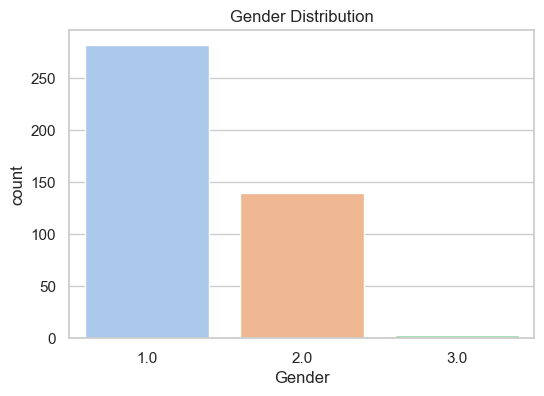

In [151]:
# Plot gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=questionnaire_data, x='What is your gender (Coded)', palette="pastel")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.show()

<p>Age Group Distribution</p>

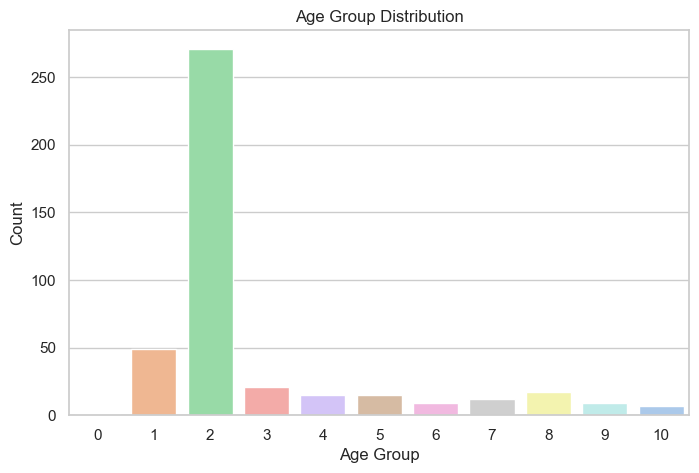

In [153]:
# Plot age group distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=questionnaire_data, x='Please select your age group: (Coded)', palette="pastel")
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

<p>Visualize Online Shopping Frequency</p>

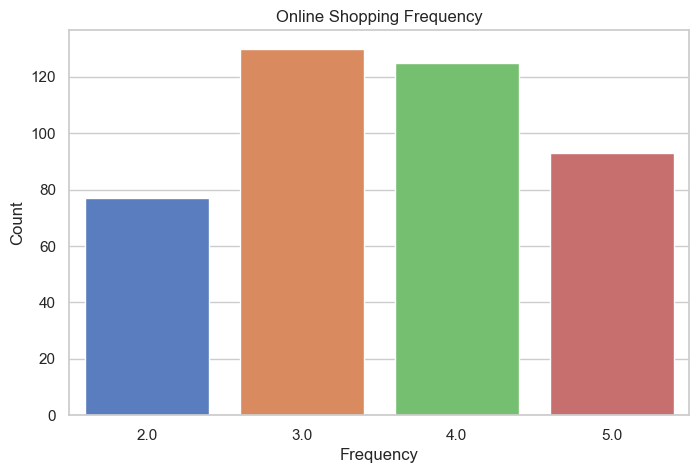

In [155]:
# Plot online shopping frequency
plt.figure(figsize=(8, 5))
sns.countplot(data=questionnaire_data, x='How frequently do you shop online every month, if at all (Coded)', palette="muted")
plt.title("Online Shopping Frequency")
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.show()


# Popular Shopping Categories
Here, we visualize the popular shopping categories by plotting a bar chart.

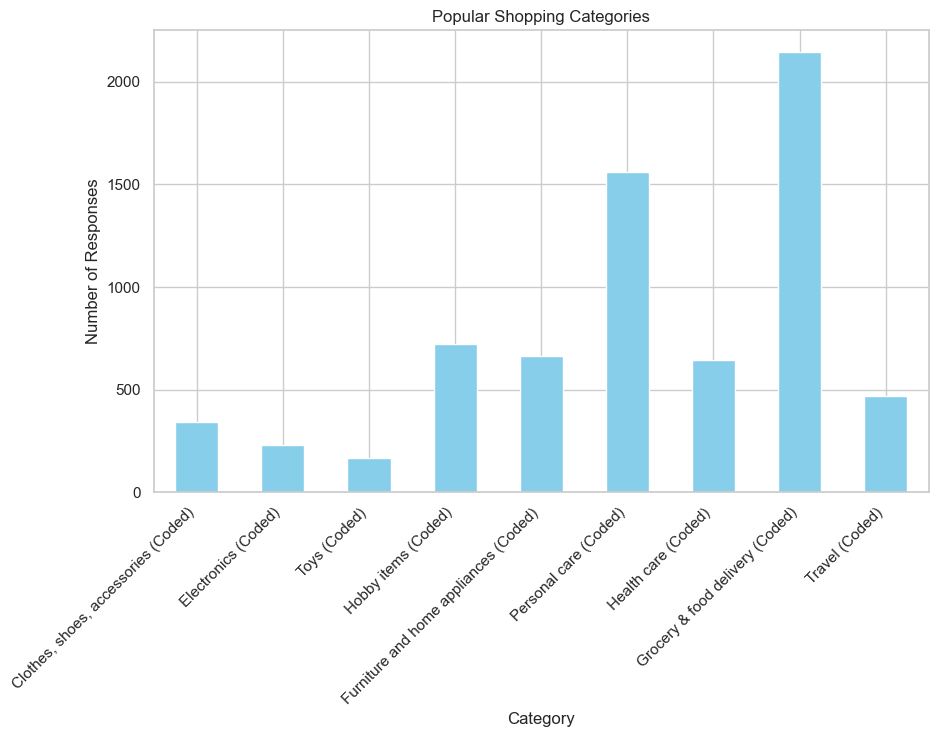

In [157]:
# Create a bar chart of shopping categories
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title("Popular Shopping Categories")
plt.xlabel("Category")
plt.ylabel("Number of Responses")
plt.xticks(rotation=45, ha="right")
plt.show()

# Importance of Online Shopping Factors
This visualization helps us see which factors are considered most important by respondents when shopping online.

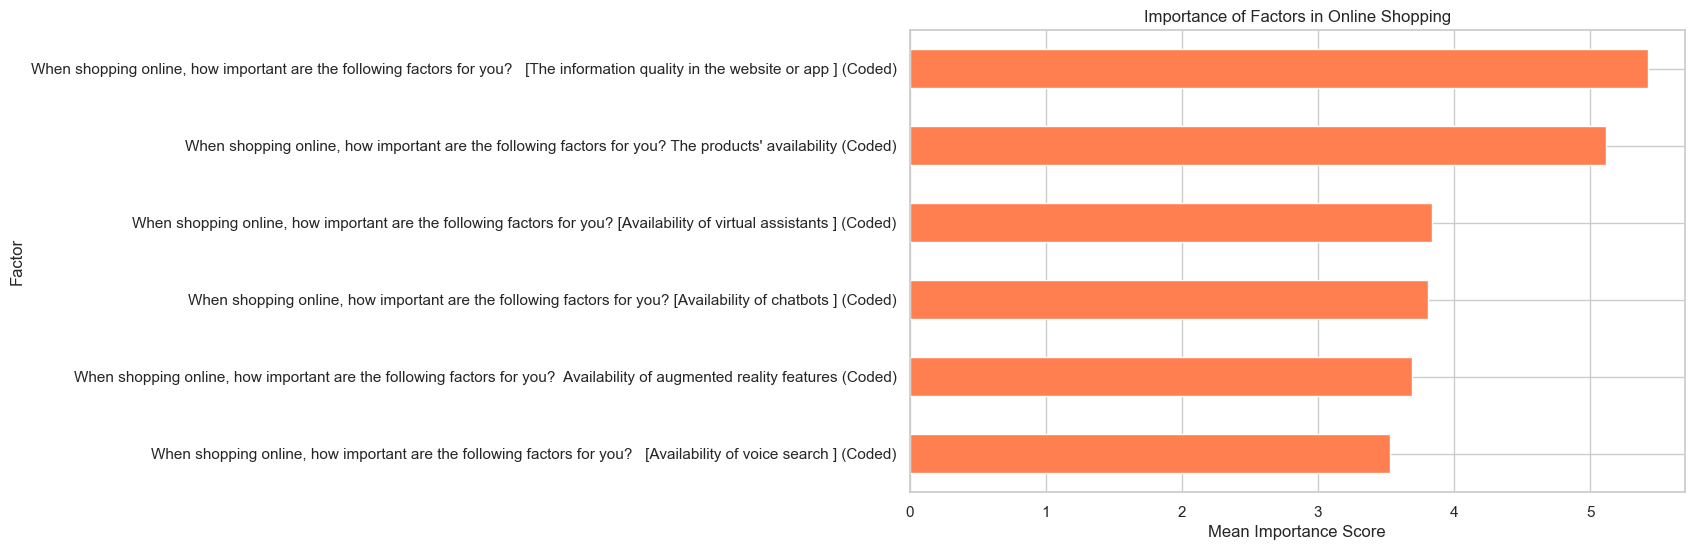

In [159]:
# Create a bar chart for importance of online shopping factors
plt.figure(figsize=(10, 6))
factor_importance.sort_values().plot(kind='barh', color='coral')
plt.title("Importance of Factors in Online Shopping")
plt.xlabel("Mean Importance Score")
plt.ylabel("Factor")
plt.show()

# AI Tools Usage in Online Shopping
This bar chart shows the usage frequency of different AI tools, helping us understand which tools are most popular.

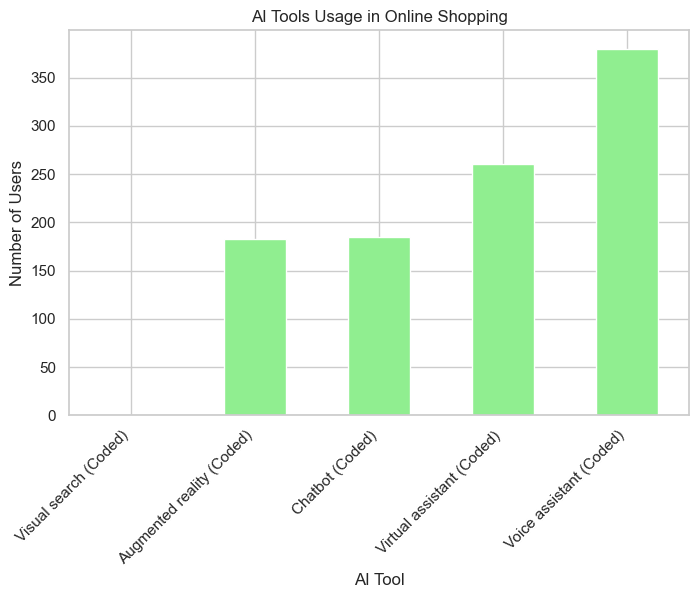

In [161]:
# Create a bar chart for AI tool usage
plt.figure(figsize=(8, 5))
ai_tool_usage.sort_values().plot(kind='bar', color='lightgreen')
plt.title("AI Tools Usage in Online Shopping")
plt.xlabel("AI Tool")
plt.ylabel("Number of Users")
plt.xticks(rotation=45, ha="right")
plt.show()


# Hypothesis 1

Null Hypothesis (H₀): Usefulness of AI tools' recommendations is not related to the usage of Virtual Assistant.

Alternative Hypothesis (H₁): Usefulness of AI tools' recommendations is related to the usage of Virtual Assistant.

# Create the Contingency Table

In [165]:
import pandas as pd
from scipy.stats import chi2_contingency

In [166]:
usefulness_column = [col for col in questionnaire_data.columns if 'useful' in col.lower() and 'recommendations' in col.lower()][0]
virtual_assistant_column = [col for col in questionnaire_data.columns if 'virtual assistant' in col.lower()][0]

# Generate the contingency table
contingency_table = pd.crosstab(
    questionnaire_data[usefulness_column], 
    questionnaire_data[virtual_assistant_column]
)
print("Contingency Table:")
print(contingency_table)

Contingency Table:
When shopping online, how important are the following factors for you? [Availability of virtual assistants ]  I do not know  \
Thinking about AI tools, please see the followi...                                                                            
Neither agree nor disagree                                                                                                1   
Somewhat agree                                                                                                            6   
Somewhat disagree                                                                                                         3   
Strongly agree                                                                                                            1   
Strongly disagree                                                                                                         2   

When shopping online, how important are the following factors for you? [Availability of vir

# Run the Chi-Square Test
Use chi2_contingency to perform the test on the contingency table.

In [168]:
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-Square Statistic: 45.44906897688176
p-value: 0.0009587425594770821
Degrees of Freedom: 20
Expected Frequencies Table:
[[ 2.41428571 23.21428571  0.37142857 16.71428571 30.82857143  4.45714286]
 [ 5.85       56.25        0.9        40.5        74.7        10.8       ]
 [ 2.38333333 22.91666667  0.36666667 16.5        30.43333333  4.4       ]
 [ 1.20714286 11.60714286  0.18571429  8.35714286 15.41428571  2.22857143]
 [ 1.1452381  11.01190476  0.17619048  7.92857143 14.62380952  2.11428571]]


# Interpret the Results

<h4>If p < 0.05: Reject the null hypothesis, indicating a significant relationship between the usefulness of AI recommendations and Virtual Assistant usage.</h4>
    
<h4>If p ≥ 0.05: Fail to reject the null hypothesis, indicating no significant relationship between the two variables.</h4>

# Hypothesis 2

Null Hypothesis (H₀): The usefulness of AI tools recommendations is not related to the usage of a virtual assistant (SA).

Alternative Hypothesis (H₁): The usefulness of AI tools recommendations is related to the usage of a virtual assistant (SA).

The typical significance level is 0.05 (5%).

In [174]:
import pandas as pd
import scipy.stats as stats

# Specify the column names
usefulness_column = [col for col in questionnaire_data.columns if 'useful' in col.lower() and 'recommendations' in col.lower()][0]
virtual_assistant_column = [col for col in questionnaire_data.columns if 'virtual assistant' in col.lower()][0]

# Generate the contingency table
contingency_table = pd.crosstab(questionnaire_data[usefulness_column], questionnaire_data[virtual_assistant_column])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Display results
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# Make the decision based on the p-value
if p_value < 0.05:
    print("\nReject the Null Hypothesis: There is a significant relationship between the usefulness of AI tools recommendations and the usage of a virtual assistant.")
else:
    print("\nFail to reject the Null Hypothesis: There is no significant relationship between the usefulness of AI tools recommendations and the usage of a virtual assistant.")


Chi-Square Statistic: 45.44906897688176
P-Value: 0.0009587425594770821
Degrees of Freedom: 20
Expected Frequencies Table:
[[ 2.41428571 23.21428571  0.37142857 16.71428571 30.82857143  4.45714286]
 [ 5.85       56.25        0.9        40.5        74.7        10.8       ]
 [ 2.38333333 22.91666667  0.36666667 16.5        30.43333333  4.4       ]
 [ 1.20714286 11.60714286  0.18571429  8.35714286 15.41428571  2.22857143]
 [ 1.1452381  11.01190476  0.17619048  7.92857143 14.62380952  2.11428571]]

Reject the Null Hypothesis: There is a significant relationship between the usefulness of AI tools recommendations and the usage of a virtual assistant.


<h3>Interpretation:</h3>

<p>Chi-Square Statistic: Measures how much the observed frequencies deviate from the expected frequencies under the null hypothesis.
P-Value: Tells you if the observed results are statistically significant. If the p-value is less than 0.05, you reject the null hypothesis and conclude that the two variables are related.</p>

<p>Degrees of Freedom (dof): Helps in determining the appropriate distribution to use for the test.
Expected Frequencies: The expected frequencies under the null hypothesis (no relationship).</p>

<h3>Decision:</h3>
If p_value < 0.05, reject the null hypothesis and conclude that the usefulness of AI tools recommendations is related to the usage of a virtual assistant.
    
If p_value ≥ 0.05, fail to reject the null hypothesis, indicating no significant relationship.

# Hypothesis 3

Null Hypothesis (H₀): The usefulness of AI tool recommendations is not related to the usage of chatbots. In other words, the two variables are independent.

Alternative(H₀):The usefulness of AI tool recommendations is related to the usage of chatbots. In other words, the two variables are dependent.

In [178]:
import pandas as pd
from scipy import stats


# Replace with the correct column names identified
usefulness_column = 'Thinking about AI tools, please see the following statements and state to what extent you agree or disagree with each one of them:[I find it useful when I get personalized recommendations from AI tools ]'  # Replace with actual column name
chatbot_column = 'Think about your experience of online shopping and chatbots, and tell us to what extent do you agree or disagree with the statement below.[I am satisfied with the assistance from Chatbot during my online shopping ]'  # Replace with actual column name

# Generate the contingency table for the two variables
contingency_table = pd.crosstab(questionnaire_data[usefulness_column], questionnaire_data[chatbot_column])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Display the test results
print("\nChi-Square Test Results:")
print(f"Chi2 Stat: {chi2_stat}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis. The usefulness of AI tools recommendations is related to the usage of chatbots.")
else:
    print("\nWe fail to reject the null hypothesis. The usefulness of AI tools recommendations is not related to the usage of chatbots.")


Contingency Table:
Think about your experience of online shopping and chatbots, and tell us to what extent do you agree or disagree with the statement below.[I am satisfied with the assistance from Chatbot during my online shopping ]  Neither agree nor disagree  \
Thinking about AI tools, please see the followi...                                                                                                                                                                                                   
Neither agree nor disagree                                                                                                                                                                                                                      33   
Somewhat agree                                                                                                                                                                                                                                  65 

# Hypothesis 4

Null Hypothesis (H0): Unplanned purchases are not triggered by AI shopping tools.

Alternative Hypothesis (H1): Unplanned purchases are triggered by AI shopping tools.

In [181]:


# Example column names, replace these with your actual column names
ai_shopping_column = 'Thinking about AI tools, please see the following statements and state to what extent you agree or disagree with each one of them:[I’m interested to buy the goods or services recommended by AI tools]'  # Column indicating if AI shopping tools were used
unplanned_column = 'Thinking about AI tools, please see the following statements and state to what extent you agree or disagree with each one of them:[I’m likely to buy unplanned goods or services when shopping online supported by AI tools]'  # Column indicating if unplanned purchases occurred

# Generate the contingency table for the two variables
contingency_table = pd.crosstab(questionnaire_data[ai_shopping_column], questionnaire_data[unplanned_column])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Display the test results
print("\nChi-Square Test Results:")
print(f"Chi2 Stat: {chi2_stat}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis. Unplanned purchases are triggered by AI shopping tools.")
else:
    print("\nWe fail to reject the null hypothesis. Unplanned purchases are not triggered by AI shopping tools.")


Contingency Table:
Thinking about AI tools, please see the following statements and state to what extent you agree or disagree with each one of them:[I’m likely to buy unplanned goods or services when shopping online supported by AI tools]  Neither agree nor disagree  \
Thinking about AI tools, please see the followi...                                                                                                                                                                                                         
Neither agree nor disagree                                                                                                                                                                                                                            56   
Somewhat agree                                                                                                                                                                                                                   

# Hypothesis 5

Null Hypothesis (H0): There is no significant difference between males and females in the types of products they frequently purchase using AI tools.

Alternative Hypothesis (H1): Males and females differ significantly in the types of products they frequently purchase using AI tools.

In [184]:

# Example column names, replace these with your actual column names
gender_column = 'What is your gender'  # Column indicating the gender (Male/Female)
product_category_column = 'And what you usually shop online most frequently?'  # Column indicating product category purchased (e.g., Electronics, Clothing)

# Generate the contingency table for Gender and Product Categories
contingency_table = pd.crosstab(questionnaire_data[gender_column], questionnaire_data[product_category_column])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Display the test results
print("\nChi-Square Test Results:")
print(f"Chi2 Stat: {chi2_stat}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("\nWe reject the null hypothesis. Males and females differ significantly in the types of products they frequently purchase using AI tools.")
else:
    print("\nWe fail to reject the null hypothesis. There is no significant difference between males and females in the types of products they frequently purchase using AI tools.")


Contingency Table:
And what you usually shop online most frequently?  Accessories  Books  \
What is your gender                                                     
Female                                                       0      2   
Male                                                         1      0   
Prefer not to say                                            0      0   

And what you usually shop online most frequently?  Books Goods for pets  \
What is your gender                                                       
Female                                                                1   
Male                                                                  0   
Prefer not to say                                                     0   

And what you usually shop online most frequently?  Car care products  \
What is your gender                                                    
Female                                                             0   
Male                   

# Hypothesis 6

Null Hypothesis (H0): The mean satisfaction score is equal to 4 (i.e., users are not particularly satisfied). H0: μ=4

Alternative Hypothesis (H1): The mean satisfaction score is greater than 4 (i.e., users are generally satisfied). H1: = μ>4

In [187]:
import pandas as pd
from scipy import stats

# Sample column name for satisfaction score
satisfaction_column = 'Think about your experience of online shopping and chatbots, and tell us to what extent do you agree or disagree with the statement below.[I am satisfied with the assistance from Chatbot during my online shopping ] (Coded)'  # Replace with your actual column name

# Step 1: Convert the satisfaction column to numeric (in case of any non-numeric values)
questionnaire_data[satisfaction_column] = pd.to_numeric(questionnaire_data[satisfaction_column], errors='coerce')

# Step 2: Drop any NaN values to avoid issues in the t-test
satisfaction_scores = questionnaire_data[satisfaction_column].dropna()

# Step 3: Perform a one-sample t-test against the mean value of 4
t_stat, p_value = stats.ttest_1samp(satisfaction_scores, 4, alternative='greater')

# Step 4: Display the results
print("One-Sample T-test Results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)
print("Mean Satisfaction Score:", satisfaction_scores.mean())

# Step 5: Interpretation
if p_value < 0.05:
    print("The mean satisfaction score is significantly higher than 4, indicating high satisfaction with AI tools.")
else:
    print("The mean satisfaction score is not significantly higher than 4, indicating satisfaction may not be particularly high.")


One-Sample T-test Results:
T-statistic: -16.270684615762566
P-value: 1.0
Mean Satisfaction Score: 3.1388235294117646
The mean satisfaction score is not significantly higher than 4, indicating satisfaction may not be particularly high.


# Hypothesis 7

Null Hypothesis (H0): The proportion of users who use AI-enabled tools at least once a month is 50% or less. H0: p≤0.5

Alternative Hypothesis (H1): The proportion of users who use AI-enabled tools at least once a month is greater than 50%. H1: = p>0.5

In [190]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

# Sample column name for frequency of AI-enabled shopping
frequency_column = 'How frequently do you shop online every month, if at all'  # Replace with the actual column name in your dataset

# Define the threshold for "at least once a month"
# Assume responses are coded such that "Monthly" or more frequent use is considered at least once a month
monthly_threshold = ['Monthly', 'Weekly', 'Daily']  # Adjust based on your dataset's coding

# Step 1: Count users who shop with AI at least once a month
monthly_users = questionnaire_data[questionnaire_data[frequency_column].isin(monthly_threshold)]

# Step 2: Calculate the sample proportion
n = len(questionnaire_data)  # Total number of responses
successes = len(monthly_users)  # Number who use AI-enabled tools at least once a month
sample_proportion = successes / n

# Step 3: Perform a one-sample proportion test
z_stat, p_value = proportions_ztest(successes, n, value=0.5, alternative='larger')

# Step 4: Display the results
print("Proportion Test Results:")
print("Z-statistic:", z_stat)
print("P-value:", p_value)
print("Sample Proportion:", sample_proportion)

# Step 5: Interpretation
if p_value < 0.05:
    print("The proportion of users who shop with AI-enabled tools at least once a month is significantly greater than 50%.")
else:
    print("There is no significant evidence that the majority of users shop with AI-enabled tools at least once a month.")


Proportion Test Results:
Z-statistic: -inf
P-value: 1.0
Sample Proportion: 0.0
There is no significant evidence that the majority of users shop with AI-enabled tools at least once a month.


# Conceptual Model

                          +------------------+           +------------------+
                          |   Gender         |---------> | Product Category |
                          +------------------+           +------------------+
                                                             Preference
   
                          +------------------+            +------------------+
                          |   Age            | -------->  | Ease of Use of   |
                          +------------------+            | AI Shopping Sites|
                                                             (Younger Users vs. Older Users)

                          +------------------+            +------------------+
                          |   Satisfaction   | -------->  | User Experience  |
                          |   Level          |            +------------------+
                          +------------------+            (Above/Below 4.0)
  
                          +------------------+            +------------------+
                          | Frequency of     | -------->  | Monthly Use of AI|
                          | AI Shopping Tool |            +------------------+
                          +------------------+            (Higher than 50%)


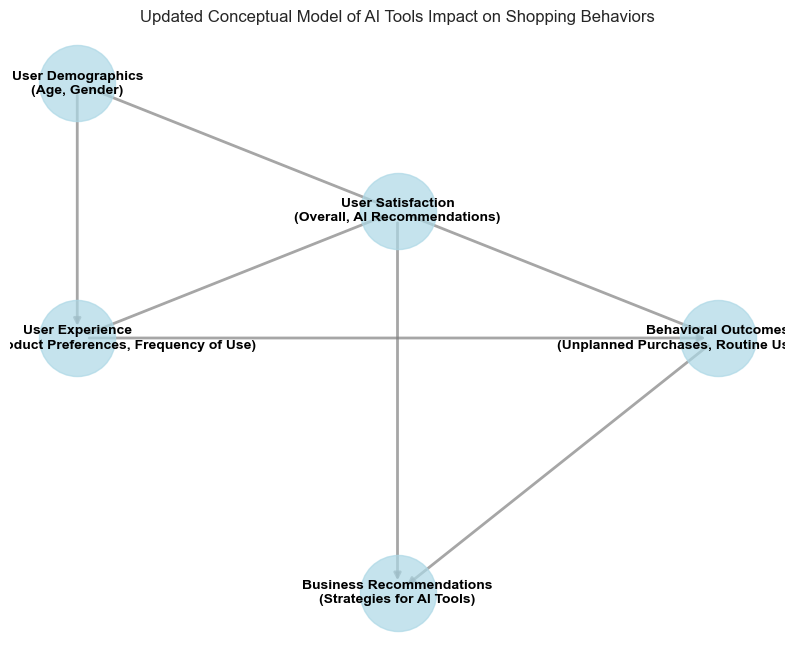

In [223]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes for each element in the updated conceptual model
nodes = [
    "User Demographics\n(Age, Gender)",
    "User Experience\n(Ease of Use, Product Preferences, Frequency of Use)",
    "User Satisfaction\n(Overall, AI Recommendations)",
    "Behavioral Outcomes\n(Unplanned Purchases, Routine Usage Patterns)",
    "Business Recommendations\n(Strategies for AI Tools)"
]

G.add_nodes_from(nodes)

# Add edges to represent relationships between elements
edges = [
    ("User Demographics\n(Age, Gender)", "User Experience\n(Ease of Use, Product Preferences, Frequency of Use)"),
    ("User Demographics\n(Age, Gender)", "User Satisfaction\n(Overall, AI Recommendations)"),
    ("User Experience\n(Ease of Use, Product Preferences, Frequency of Use)", "User Satisfaction\n(Overall, AI Recommendations)"),
    ("User Experience\n(Ease of Use, Product Preferences, Frequency of Use)", "Behavioral Outcomes\n(Unplanned Purchases, Routine Usage Patterns)"),
    ("User Satisfaction\n(Overall, AI Recommendations)", "Behavioral Outcomes\n(Unplanned Purchases, Routine Usage Patterns)"),
    ("User Satisfaction\n(Overall, AI Recommendations)", "Business Recommendations\n(Strategies for AI Tools)"),
    ("Behavioral Outcomes\n(Unplanned Purchases, Routine Usage Patterns)", "Business Recommendations\n(Strategies for AI Tools)")
]

G.add_edges_from(edges)

# Define positions for the nodes in the graph for a clearer layout
pos = {
    "User Demographics\n(Age, Gender)": (0, 0),
    "User Experience\n(Ease of Use, Product Preferences, Frequency of Use)": (0, -2),
    "User Satisfaction\n(Overall, AI Recommendations)": (2, -1),
    "Behavioral Outcomes\n(Unplanned Purchases, Routine Usage Patterns)": (4, -2),
    "Business Recommendations\n(Strategies for AI Tools)": (2, -4)
}

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="lightblue", alpha=0.7)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, alpha=0.7, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold", font_color="black")

# Show the plot
plt.title("Updated Conceptual Model of AI Tools Impact on Shopping Behaviors")
plt.axis("off")
plt.show()
